# Package Management

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.datasets import fetch_california_housing

# Data Load

In [5]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8610,5.0784,37.0,6.096552,1.082759,802.0,2.765517,33.86,-118.36,2.959
15937,4.2672,47.0,4.650794,0.971429,1119.0,3.552381,37.72,-122.40,2.194
19238,4.5167,24.0,5.977667,1.151365,1006.0,2.496278,38.54,-122.62,2.652
2421,3.7813,18.0,5.357143,1.052632,753.0,2.830827,36.58,-119.45,0.873
875,4.6978,24.0,5.663313,1.000671,4446.0,2.981891,37.56,-122.03,2.403


In [8]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# Data Prep

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
X = df.drop(columns = 'MedHouseVal', axis = 1)
y = df['MedHouseVal']

In [11]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [13]:
print(f"X_train: {X_train.shape} || X_test: {X_test.shape} || y_train: {y_train.shape} || y_test: {y_test.shape}")

X_train: (16512, 8) || X_test: (4128, 8) || y_train: (16512,) || y_test: (4128,)


# Model Fitting

In [14]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
model.fit(X_train,y_train)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [17]:
model.intercept_

np.float64(-37.02327770606416)

# Prediction

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

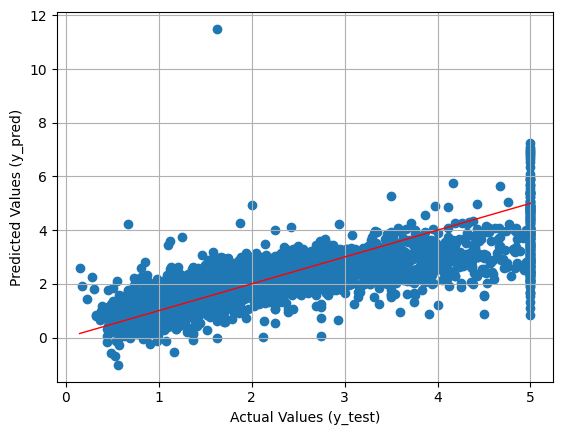

In [19]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=1)

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.grid(True)
plt.show()

# Evaluation

In [20]:
mse = mean_squared_error(y_test,y_pred)
mse

0.5558915986952442

In [21]:
rmse = np.sqrt(mse)
rmse

np.float64(0.7455813830127763)

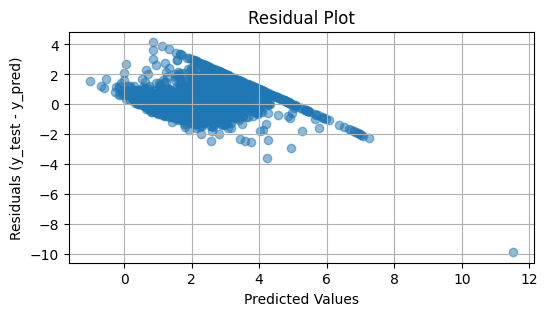

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(6,3))
plt.scatter(y_pred, residuals, alpha=0.5)
# plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


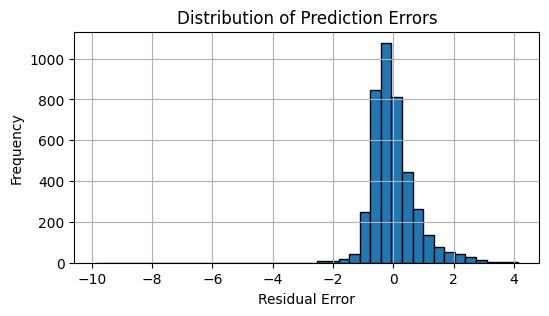

In [23]:
plt.figure(figsize=(6,3))
plt.hist(residuals, bins=40, edgecolor='black')
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()


# Regularization

## Ridge (L1)

1. Considers all Features
2. Gently brings down large coefficients
3. Reduces Variance

In [24]:
from sklearn.linear_model import Ridge

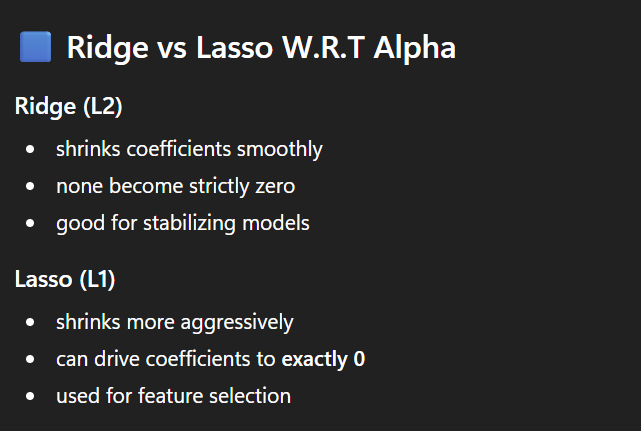
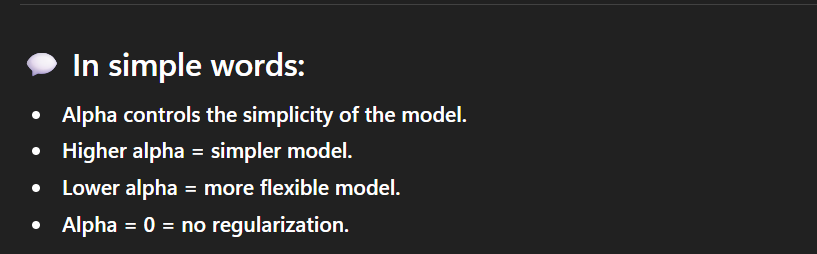

### Model Fitting

In [25]:
ridge = Ridge(alpha = 1) #alpha control how badly we punish large coefficients
ridge

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [26]:
ridge.fit(X_train, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


### Prediction

In [27]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [28]:
ridge_pred = ridge.predict(X_test)

In [29]:
ridge_pred

array([0.71923978, 1.76395141, 2.70909238, ..., 4.46864495, 1.18785499,
       2.00912494], shape=(4128,))

### Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error


In [31]:
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
ridge_rmse

0.7455222779992702

## Lasso (L2)
1. Removes Features with coefficients = 0 for weak or noisy features
2. Makes the model simplier

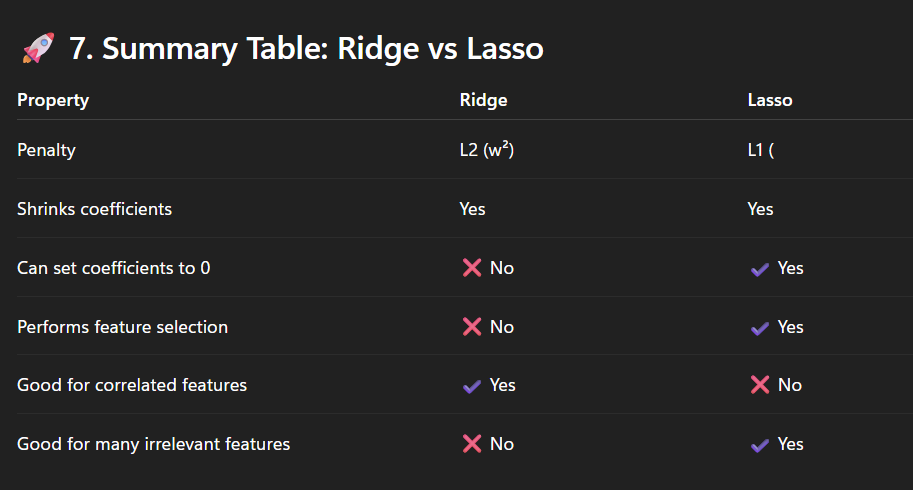

In [32]:
from sklearn.linear_model import Lasso

### Model Fitting

In [33]:
lasso = Lasso(alpha = 0.1)
lasso

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [34]:
lasso.fit(X_train, y_train)
lasso

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [35]:
lasso.coef_ # out of 8 features, lasso removed 5 features.

array([ 3.92693362e-01,  1.50810624e-02, -0.00000000e+00,  0.00000000e+00,
        1.64168387e-05, -3.14918929e-03, -1.14291203e-01, -9.93076483e-02])

In [36]:
coef = lasso.coef_
coef

array([ 3.92693362e-01,  1.50810624e-02, -0.00000000e+00,  0.00000000e+00,
        1.64168387e-05, -3.14918929e-03, -1.14291203e-01, -9.93076483e-02])

In [37]:
feature_names = X_train.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [38]:
# feature_names[coef == 0]
feature_names[coef != 0]

Index(['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

In [39]:
lasso.intercept_

np.float64(-7.698845419807446)

### Prediction

In [40]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([1.04628114, 1.61196314, 2.30822511, ..., 4.17618895, 1.64031173,
       1.81210646], shape=(4128,))

### Evaluation

In [41]:
from sklearn.metrics import root_mean_squared_error

In [42]:
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_rmse

0.7832697618354822

# Combining

In [43]:
model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [44]:
ridge.coef_

array([ 4.48510924e-01,  9.72596535e-03, -1.23014157e-01,  7.81416761e-01,
       -2.02581346e-06, -3.52585878e-03, -4.19786908e-01, -4.33680793e-01])

In [45]:
lasso.coef_

array([ 3.92693362e-01,  1.50810624e-02, -0.00000000e+00,  0.00000000e+00,
        1.64168387e-05, -3.14918929e-03, -1.14291203e-01, -9.93076483e-02])

In [46]:
total_coef = pd.DataFrame([model.coef_,ridge.coef_,lasso.coef_], columns = X_train.columns, index = ["lr","ridge","lasso"])

In [47]:
total_coef

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
lr,0.448675,0.009724,-0.123323,0.783145,-0.000002,-0.003526,-0.419792,-0.433708
ridge,0.448511,0.009726,-0.123014,0.781417,-0.000002,-0.003526,-0.419787,-0.433681
lasso,0.392693,0.015081,-0.000000,0.000000,0.000016,-0.003149,-0.114291,-0.099308


In [48]:
import pandas as pd

coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "LinearRegression": model.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

coef_df


,feature,LinearRegression,Ridge,Lasso
0,MedInc,0.448675,0.448511,0.392693
1,HouseAge,0.009724,0.009726,0.015081
2,AveRooms,-0.123323,-0.123014,-0.000000
3,AveBedrms,0.783145,0.781417,0.000000
4,Population,-0.000002,-0.000002,0.000016
5,AveOccup,-0.003526,-0.003526,-0.003149
6,Latitude,-0.419792,-0.419787,-0.114291
7,Longitude,-0.433708,-0.433681,-0.099308


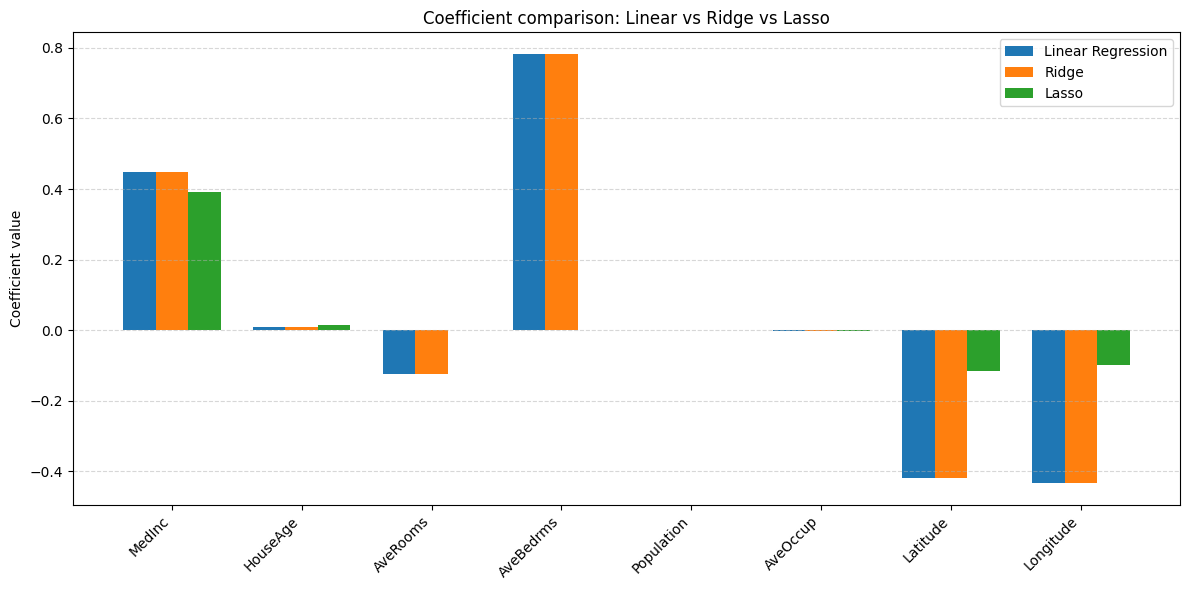

In [49]:
import numpy as np
import matplotlib.pyplot as plt

features = coef_df["feature"]
x = np.arange(len(features))  # positions for bars

width = 0.25  # width of each bar

plt.figure(figsize=(12, 6))

plt.bar(x - width, coef_df["LinearRegression"], width, label="Linear Regression")
plt.bar(x, coef_df["Ridge"], width, label="Ridge")
plt.bar(x + width, coef_df["Lasso"], width, label="Lasso")

plt.xticks(x, features, rotation=45, ha="right")
plt.ylabel("Coefficient value")
plt.title("Coefficient comparison: Linear vs Ridge vs Lasso")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


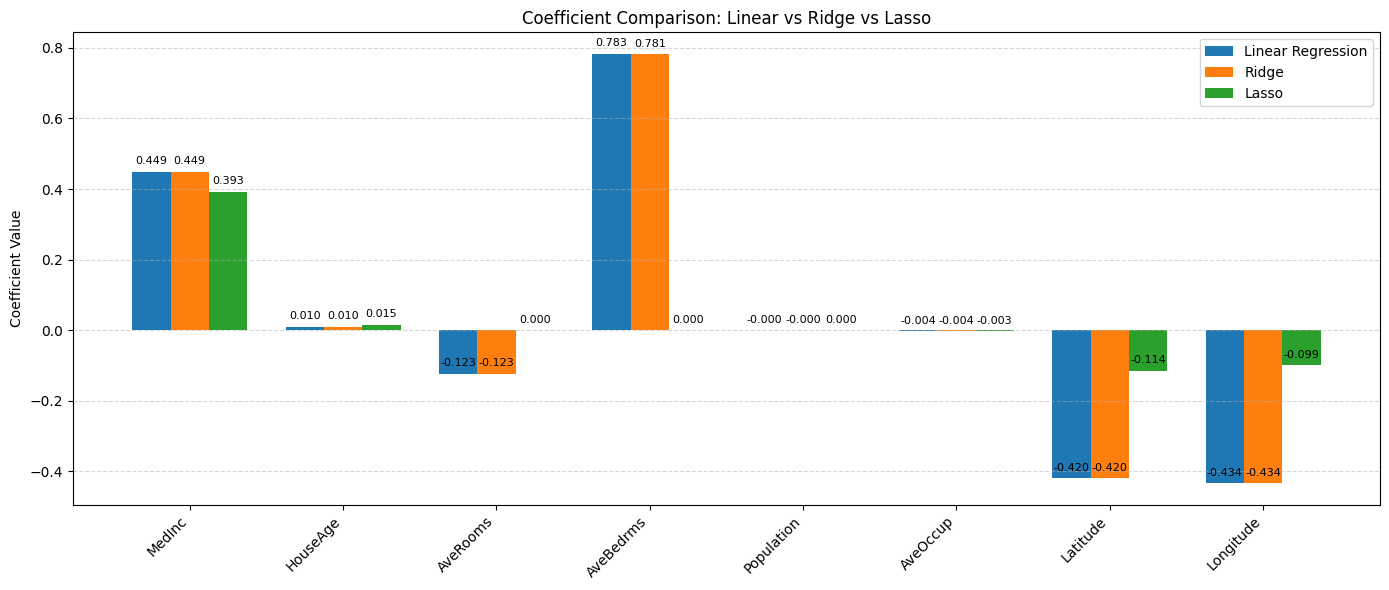

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Build the coefficient comparison table (use your models)
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "LinearRegression": model.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

# Plot setup
features = coef_df["feature"]
x = np.arange(len(features))
width = 0.25

plt.figure(figsize=(14, 6))

# Bars
bars_lr    = plt.bar(x - width, coef_df["LinearRegression"], width, label="Linear Regression")
bars_ridge = plt.bar(x,          coef_df["Ridge"],           width, label="Ridge")
bars_lasso = plt.bar(x + width,  coef_df["Lasso"],           width, label="Lasso")

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(
            f'{height:.3f}',               # format label
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 4),                 # offset from bar
            textcoords="offset points",
            ha='center', va='bottom',
            fontsize=8
        )

add_labels(bars_lr)
add_labels(bars_ridge)
add_labels(bars_lasso)

# Styling
plt.xticks(x, features, rotation=45, ha="right")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()
